In [24]:
import kwant

from matplotlib import pyplot

Now considering position dependent potential
$H = \frac{-\hbar^2}{2m}(\partial_{x}^2+\partial_{y}^2)+V(x,y)$

In [41]:
def make_potential_system(a=1, t=1.0, W=10, L=30, L_well=10):
    lat = kwant.lattice.square(a)
    
    sys = kwant.Builder()
    
    def potential(site, pot):
        (x, y) = site.pos
        if (L - L_well) / 2 < x < (L + L_well) / 2:
            return pot
        else:
            return 0
    
    def onsite(site, pot):
        return 4 * t + potential(site, pot)
    
    sys[(lat(x, y) for x in range (L) for y in range (W))] = onsite
    sys[lat.neighbors()] = -t
    
    lead = kwant.Builder(kwant.TranslationalSymmetry((-a, 0)))
    lead[(lat(0, j) for j in range(W))] = 4 * t
    lead[lat.neighbors()] = -t
    sys.attach_lead(lead)
    sys.attach_lead(lead.reversed())
    
    return sys

Notice here we use params to set potential

In [45]:
def plot_conductance(sys, energy, welldepths):

    # Compute conductance
    data = []
    for welldepth in welldepths:
        smatrix = kwant.smatrix(sys, energy, params=dict(pot=-welldepth))
        data.append(smatrix.transmission(1, 0))

    pyplot.figure()
    pyplot.plot(welldepths, data)
    pyplot.xlabel("well depth [t]")
    pyplot.ylabel("conductance [e^2/h]")
    pyplot.show()

Changing well depths, we change the potential in the well

In [43]:
def main():
    sys = make_potential_system()

    # Check that the system looks as intended.
    kwant.plot(sys)

    # Finalize the system.
    sys = sys.finalized()

    # We should see conductance steps.
    plot_conductance(sys, energy = 0.2, welldepths=[0.01 * i for i in range(100)])

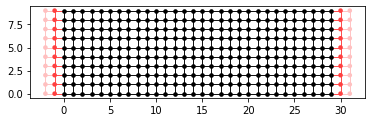

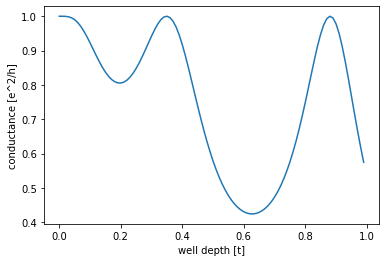

In [44]:
if __name__ == '__main__':
    main()